In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how="left", on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
agg = combined_df.groupby("city")
avg_fare = agg["fare"].mean()
total_rides = agg["ride_id"].count()
total_drivers = agg["driver_count"].mean()
city_type = agg["type"].max()
agg_df = pd.DataFrame({"Average Fare": avg_fare, "Total # Rides": total_rides, "Total # Drivers": total_drivers,
                      "Type": city_type})
agg_df.head()

,Average Fare,Total # Drivers,Total # Rides,Type
city,,,,
Amandaburgh,24.641667,12,18,Urban
Barajasview,25.332273,26,22,Urban
Barronchester,36.422500,11,16,Suburban
Bethanyland,32.956111,22,18,Suburban
Bradshawfurt,40.064000,7,10,Rural


In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_df = agg_df.loc[agg_df["Type"] == "Urban", :]
suburban_df = agg_df.loc[agg_df["Type"] == "Suburban", :]
rural_df = agg_df.loc[agg_df["Type"] == "Rural", :]

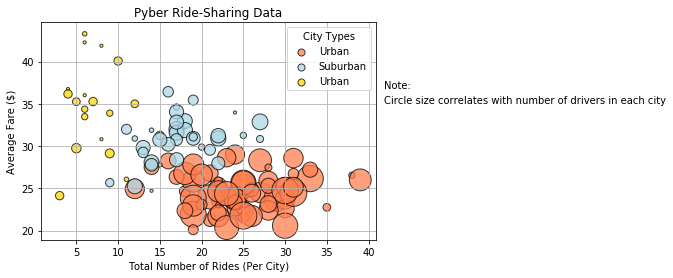

In [4]:
# Build the scatter plots for each city types
ax1 = urban_df.plot.scatter(x = "Total # Rides", y = "Average Fare", s = 10 * urban_df["Total # Drivers"], color = "coral", 
                            alpha = 0.75, edgecolors = "k", linewidths = 1, label = "Urban")
ax2 = suburban_df.plot.scatter(x = "Total # Rides", y = "Average Fare", s = 10 * suburban_df["Total # Drivers"], 
                               color = "lightblue", alpha = 0.75, edgecolors = "k", linewidths = 1, ax = ax1, label = "Suburban")
ax3 = rural_df.plot.scatter(x = "Total # Rides", y = "Average Fare", s = 10 * rural_df["Total # Drivers"], color = "gold", 
                            alpha = 0.75, edgecolors = "k", linewidths = 1, ax = ax1, label = "Urban")

# Create a legend
lgnd = plt.legend(title = "City Types", loc = "best")
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])

# Incorporate a text label regarding circle size
note = "Note:"
comment = "Circle size correlates with number of drivers in each city"
plt.figtext(.92,.65, note)
plt.figtext(.92, .6, comment)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride-Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Save Figure
plt.savefig("Images/Pyber Ride-Sharing Data.png")

## Total Fares by City Type

In [5]:
# Calculate Type Percents
agg = combined_df.groupby("type")
total_fares = agg["fare"].sum()
agg_df1 = pd.DataFrame({"Total Fare": total_fares})
agg_df1

,Total Fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


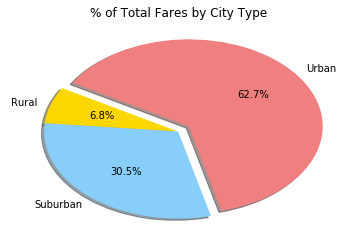

In [10]:
# Build Pie Chart
plt.pie(agg_df1["Total Fare"], explode = [0,0,0.1], colors = ["gold", "lightskyblue", "lightcoral"], 
        labels = agg_df1.index.values, autopct = "%1.1f%%", shadow = True, startangle = 150)
#plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Total Fares by City Type.png")

## Total Rides by City Type

In [11]:
# Calculate Ride Percents
agg = combined_df.groupby("type")
total_rides = agg["ride_id"].count()
agg_df2 = pd.DataFrame({"Total Rides": total_rides})
agg_df2

,Total Rides
type,
Rural,125
Suburban,625
Urban,1625


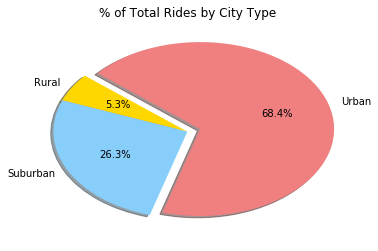

In [12]:
# Build Pie Chart
plt.pie(agg_df2["Total Rides"], explode = [0,0,0.1], colors = ["Gold", "LightSkyBlue", "LightCoral"], 
        labels = agg_df2.index.values, autopct = "%1.1f%%", shadow = True, startangle = 140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Total Rides by City Type.png")

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
agg = city_df.groupby("type")
num_drivers = agg["driver_count"].sum()
agg_df3 = pd.DataFrame({"Total Drivers": num_drivers})
agg_df3

,Total Drivers
type,
Rural,78
Suburban,490
Urban,2405


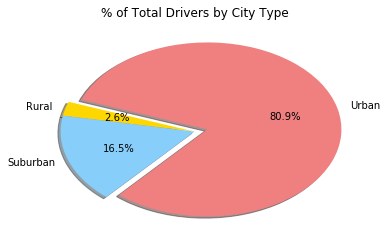

In [14]:
# Build Pie Charts
plt.pie(agg_df3["Total Drivers"], explode = [0,0,0.1], colors = ["Gold", "LightSkyBlue", "LightCoral"], 
        labels = agg_df3.index.values, autopct = "%1.1f%%", shadow = True, startangle = 160)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Total Drivers by City Type.png")